##                               Multiple Linear Regression Model On 50-Startup

## Goal:-¶
To predict whether a particular startup would be safe to invest in or not.

## -----------------------------Importing Libraries------------------------------

In [6]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score 

## ---------------------------Loading the Dataset-------------------------

In [13]:
df =  pd.read_csv(r"C:\Users\salvi\Downloads\archive (1)\50_Startups.csv")

In [15]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## ----------------------------Exploring the Dataset-----------------------

In [18]:

print("Shape of the dataset:", df.shape)

Shape of the dataset: (50, 5)


In [20]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [22]:
print("Descriptive statistics:\n", df.describe())

Descriptive statistics:
            R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [24]:
print("Data types:\n", df.dtypes)

Data types:
 R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


## ------------------------Data Preprocessing--------------------------

In [27]:
# One-hot encoding for categorical variable "State"
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target variable (y)
X = df.drop('Profit', axis=1)  # Features
y = df['Profit']  # Target variable

## ----------------------Splitting the Dataset------------------------

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (40, 5)
Testing set shape: (10, 5)


## -----------------------Building the Model------------------------

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## ---------------------Making Predictions-------------------

In [38]:
y_pred = model.predict(X_test)

print("Predictions:\n", y_pred)

Predictions:
 [126362.87908255  84608.45383634  99677.49425147  46357.46068582
 128750.48288504  50912.4174188  109741.35032702 100643.24281647
  97599.27574594 113097.42524432]


## -----------------------Evaluating the Model--------------------

In [41]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 82010363.04430102
R-squared: 0.8987266414328637


## -------------------------Visualizing the Results-----------------------

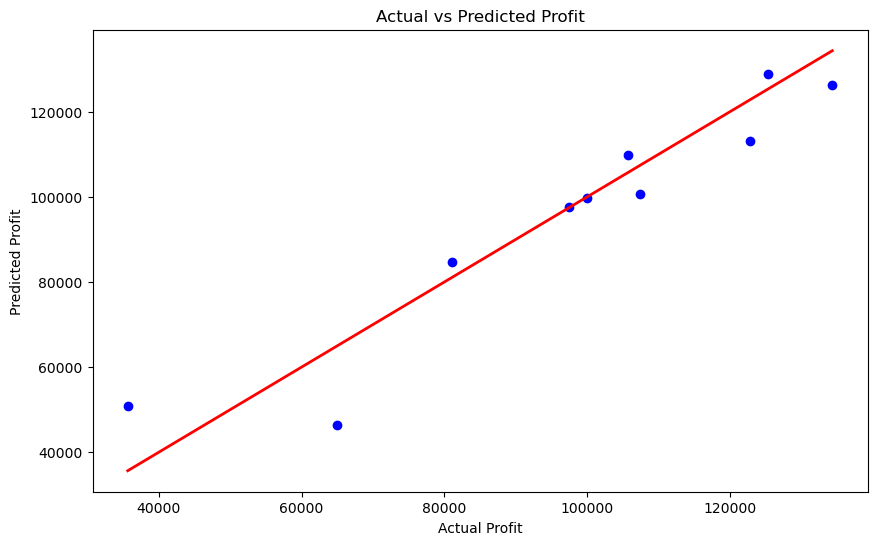

In [44]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()